In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('NDX100_stock.csv')
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2000-01-03 00:00:00-05:00,3755.739990,3836.860107,3643.250000,3790.550049,1510070000,0.0,0.0
1,2000-01-04 00:00:00-05:00,3766.570068,3766.570068,3542.729980,3546.199951,1511840000,0.0,0.0
2,2000-01-05 00:00:00-05:00,3543.129883,3576.169922,3371.750000,3507.310059,1735670000,0.0,0.0
3,2000-01-06 00:00:00-05:00,3488.310059,3513.550049,3334.020020,3340.810059,1598320000,0.0,0.0
4,2000-01-07 00:00:00-05:00,3337.260010,3529.750000,3314.750000,3529.600098,1634930000,0.0,0.0
...,...,...,...,...,...,...,...,...
6220,2024-09-24 00:00:00-04:00,19917.560547,19984.470703,19739.669922,19944.839844,5347580000,0.0,0.0
6221,2024-09-25 00:00:00-04:00,19922.279297,20043.429688,19921.220703,19972.609375,4858060000,0.0,0.0
6222,2024-09-26 00:00:00-04:00,20273.300781,20273.300781,19966.990234,20115.539062,5669210000,0.0,0.0
6223,2024-09-27 00:00:00-04:00,20147.279297,20152.529297,19964.130859,20008.619141,5367890000,0.0,0.0


In [ ]:
# sort the data by date
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)

# Create the target column for next day's Close price
df['Next_Day_Close'] = df['Close'].shift(-1)

# Drop the last row as it doesn't have a target
df = df[:-1]

# Features and Target
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Next_Day_Close']  # Target is next day's Close price

# Split data into training and testing sets
split_index = int(len(X) * 0.9)
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

<ipython-input-37-e54513242792>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 782.66
R^2 Score: 0.78
Mean Squared Error (MSE): 1755111.75
Root Mean Squared Error (RMSE): 1324.81


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
y_pred_np = y_pred.reshape(-1, 1)
y_test_np = y_test.values.reshape(-1, 1)

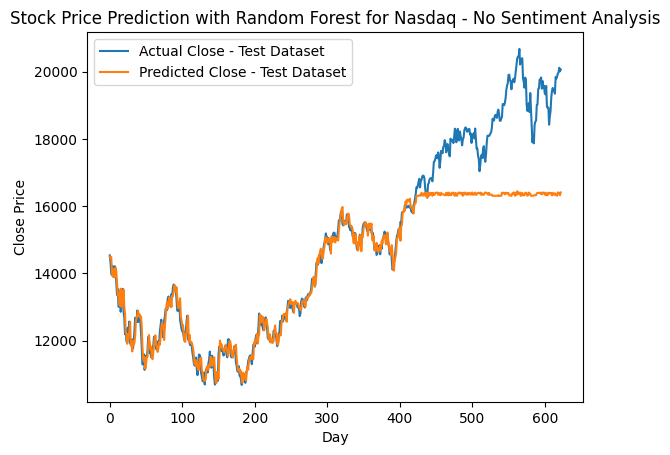

In [ ]:
plt.plot(y_test_np, label='Actual Close - Test Dataset')
plt.plot(y_pred_np, label='Predicted Close - Test Dataset')
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction with Random Forest for Nasdaq - No Sentiment Analysis')
plt.legend()
plt.show()

In [ ]:
df = pd.read_csv('SP500_stock.csv')
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,0.0,0.0
1,2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,0.0,0.0
2,2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,0.0,0.0
3,2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,0.0,0.0
4,2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,0.0,0.0
...,...,...,...,...,...,...,...,...
6220,2024-09-24 00:00:00-04:00,5727.660156,5735.319824,5698.990234,5732.930176,3872710000,0.0,0.0
6221,2024-09-25 00:00:00-04:00,5733.649902,5741.029785,5712.060059,5722.259766,3624910000,0.0,0.0
6222,2024-09-26 00:00:00-04:00,5762.220215,5767.370117,5721.009766,5745.370117,4391180000,0.0,0.0
6223,2024-09-27 00:00:00-04:00,5755.359863,5763.779785,5727.339844,5738.169922,3898530000,0.0,0.0


In [ ]:
# sort the data by date
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)

# Create the target column for next day's Close price
df['Next_Day_Close'] = df['Close'].shift(-1)

# Drop the last row as it doesn't have a target
df = df[:-1]

# Features and Target
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Next_Day_Close']  # Target is next day's Close price

# Split data into training and testing sets
split_index = int(len(X) * 0.9)
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]s

<ipython-input-42-e54513242792>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
s
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 191.18
R^2 Score: 0.67
Mean Squared Error (MSE): 109933.04
Root Mean Squared Error (RMSE): 331.56


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
y_pred_np = y_pred.reshape(-1, 1)
y_test_np = y_test.values.reshape(-1, 1)

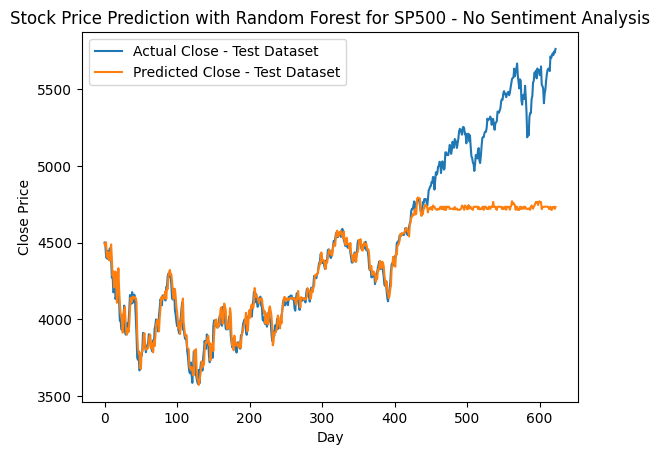

In [ ]:
plt.plot(y_test_np, label='Actual Close - Test Dataset')
plt.plot(y_pred_np, label='Predicted Close - Test Dataset')
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction with Random Forest for SP500 - No Sentiment Analysis')
plt.legend()
plt.show()